In [ ]:
import numpy as np
import ipywidgets as widgets
from skimage import io
from matplotlib import pyplot as plt

In [ ]:
im = io.imread("images/redpanda.png")
plt.imshow(im)
plt.show()

In [ ]:
im.shape

Lo spazio colore è mappato in modo da facilitare l'analisi (R, G, B, $\alpha$)

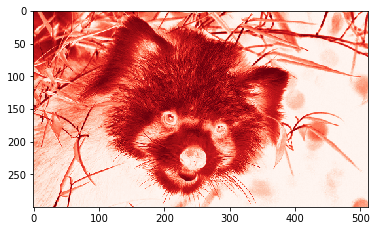

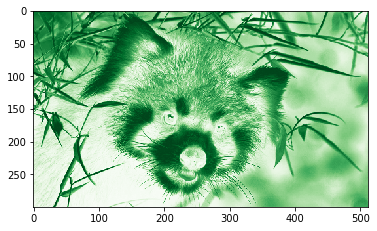

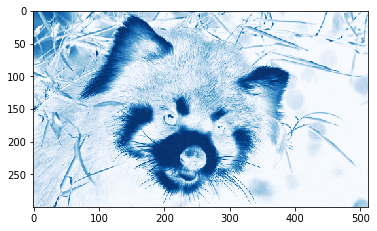

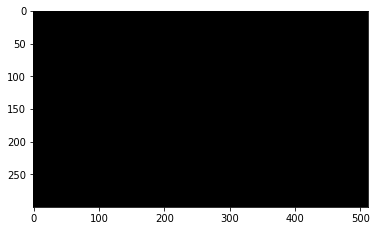

In [18]:
for i, col in enumerate(["Reds", "Greens", "Blues", "gray"]):
    plt.imshow(im[:, :, i], cmap=col)
    plt.show()

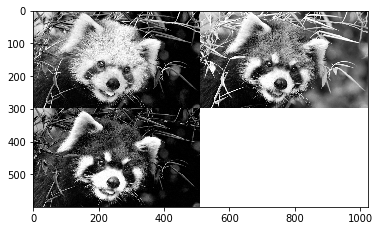

In [15]:
plt.imshow(np.concatenate([np.concatenate([im[:, :, 0], im[:, :, 1]], axis=1),
                           np.concatenate([im[:, :, 2], im[:, :, 3]], axis=1)],
                         axis=0), cmap="gray")
plt.show()

Per giocare con la luce si converte l'immagine in bianco e nero

(300, 512)


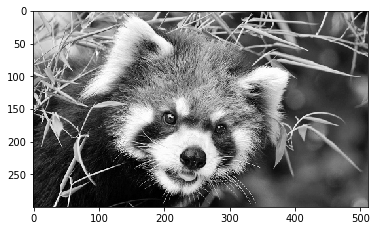

In [26]:
im_bw = io.imread("images/redpanda.png", as_gray=True)
print(im_bw.shape)
plt.imshow(im_bw, cmap="gray")
plt.show()

In [28]:
# Dimostrazione interattiva gamma
def gamma_correct(gamma=1.0):
    ax1 = plt.subplot(121)
    ax1.imshow(im_bw ** gamma, cmap='gray');
    ax2 = plt.subplot(122)
    xs = np.array(range(101)) / 100.0
    ys = xs ** gamma
    ax2.plot([0, 1], [0, 1], dashes=[1, 1])
    ax2.plot(xs,ys)
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 1])
gamma_slider = widgets.FloatLogSlider(min=-1, max=1, base=10, value=1.0)
widgets.interact(gamma_correct, gamma=gamma_slider)

interactive(children=(FloatLogSlider(value=1.0, description='gamma', max=1.0, min=-1.0), Output()), _dom_class…

<function __main__.gamma_correct(gamma=1.0)>

con le operazioni puntuali è sempre possibile tornare all'immagine originale trovando la funzione inversa.

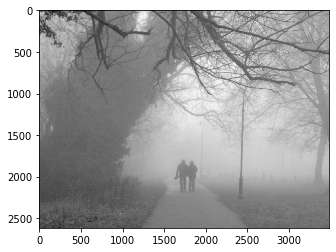

In [30]:
fog = io.imread("images/fog.jpg", as_gray=True)
plt.imshow(fog, cmap="gray")
plt.show()

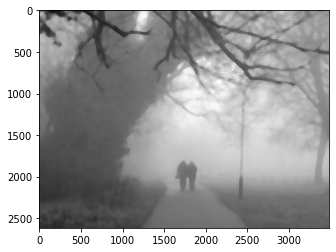

In [33]:
from skimage import filters
se = np.ones((50, 50))
fog_order = filters.rank.percentile(fog, se, p0=.5)
plt.imshow(fog_order, cmap="gray")
plt.show()

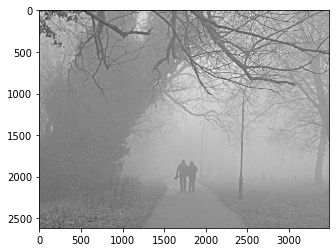

In [52]:
# VALE COME ASSIGNMENT

def unsharp(image, sigma=1):
    sharper_filter = image - filters.gaussian(image, sigma)
    return sharper_filter + image

plt.imshow(unsharp(fog, 20), cmap="gray")
plt.show()

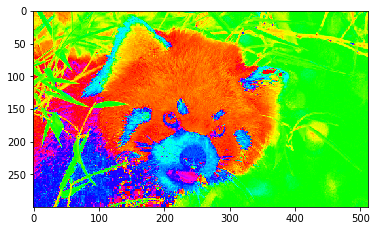

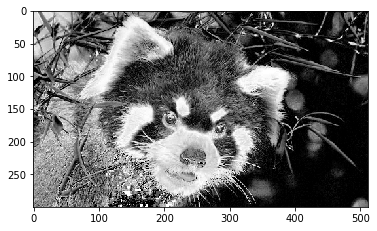

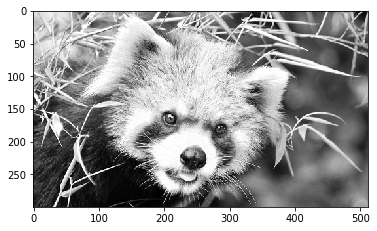

In [66]:
from skimage import color
im_hsv = color.rgb2hsv(im[:, :, 0:3])  # it is an RGBa
for i, col in enumerate(["hsv", "binary", "gray"]):
    plt.imshow(im_hsv[:, :, i], cmap=col)
    plt.show()

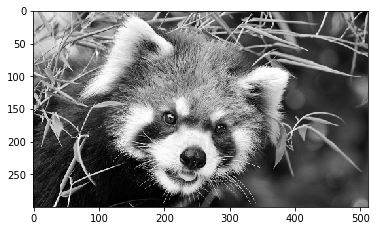

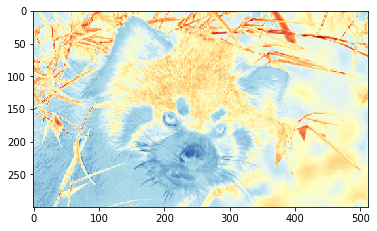

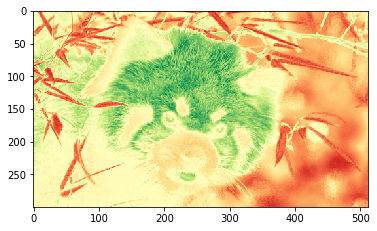

In [69]:
im_ycbcr = color.rgb2ycbcr(im[:, :, 0:3]) / 255
for i, col in enumerate(["gray", "RdYlBu", "RdYlGn"]):
    plt.imshow(im_ycbcr[:, :, i], cmap=col)
    plt.show()

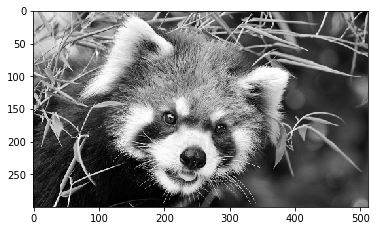

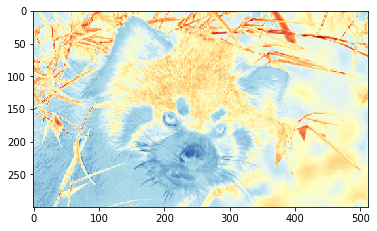

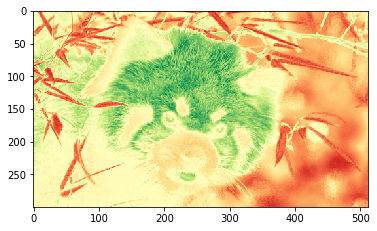

In [72]:
im_ycbcr_2 = im_ycbcr.copy()
im_ycbcr_2[:, :, 0] = im_ycbcr_2[:, :, 0] ** 10
for i, col in enumerate(["gray", "RdYlBu", "RdYlGn"]):
    plt.imshow(im_ycbcr[:, :, i], cmap=col)
    plt.show()